데이터 분석의 목표 : 어떤 사람들이 생존에 유리했을지 파악하기

참고(in Kaggle)
1.  EDA To Prediction(DieTanic) 
2.  Titanic Data Science Solutions

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/train.csv')
test_df = pd.read_csv('/content/Mydrive/MyDrive/datascience/test.csv')
combine = [train_df, test_df] # train셋과 test셋을 동시에 전처리 하기 위함 

# 데이터 확인하기

**★각 컬럼에 대한 설명입니다★**

PassengerId : 각 승객의 고유 번호

Survived : 생존 여부(생존x : 0, 생존O : 1)

Pclass :  티켓의 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)

Name : 탑승객의 이름

Sex : 탑승객의 성별 (male or female)

Age : 탑승객의 나이

SibSp : 함께 탑승한 형제 또는 배우자 수 

Parch : 함께 탑승한 부모 또는 자녀 수 

Ticket : 티켓 번호

Fare : 요금

Cabin : 선실 번호

Embarked : 탑승장소(S = Southhampton, C = Cherbourg, Q = Queenstown)


데이터 유형 살피기
- categorical : sex, embarked
- ordinal : Pclass
- continous : Age

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**1. 공통적으로 Age, Cabin, Embarked 에 NaN값이 존재, test셋에는 Fare에 1개의 NaN값이 존재**

**2.  Name, Sex, Age, Fare, Embarked 는 인코딩 작업이 필요 해 보인다.** 

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df[['SibSp', 'Parch']].head(15)

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,3,1
8,0,2
9,1,0


**1. Sibsp 와 Parch는 한개의 컬럼으로 줄일 수 있을것 같다.**

**2. Embarked는 위의 자료만으로 확실하게 필요한 데이터 라는 여부를 판단하기 힘들다.**

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Crease, Mr. Ernest James",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
test_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Williams, Mr. Richard Norris II",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**1. 남성 탑승객이 여성 탑승객 보다 많은 것을 알 수 있다.**

**2. 다수의 승객분들이 Southampton에서 탑승한 것을 알 수 있다.**

# 시각화를 통한 데이터 탐색하기

얼마나 많은 사람들이 살아남았는가?

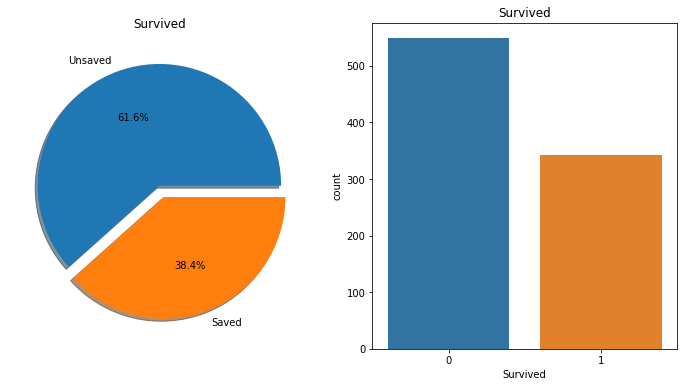

In [11]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
train_df['Survived'].value_counts().plot.pie(labels = ['Unsaved','Saved'], explode=[0,0.1],autopct='%1.1f%%',ax= ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('') 
sns.countplot(x ='Survived', data = train_df,ax = ax[1] )
ax[1].set_title('Survived')
plt.show()

### 티켓 등급과 생존의 관계 ( Relationship between Pclass and Survived)

In [12]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


crosstab

pd.crosstab(index, columns,margins= , normalize = )

pd.crosstab([id1,id2],[col1,col2],margins= , normalize = )

- margins : 행 합, 열 합
- normalize : 비율(퍼센트 표기)
- rownames=[' '] , colnames = [' ']
 


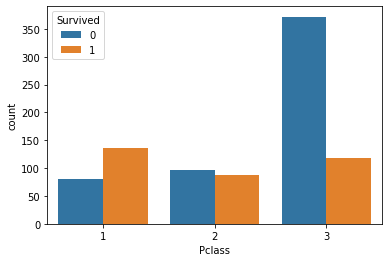

In [13]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)

**티켓의 등급이 높을 수록 생존율이 높다.**

### 성별과 생존과의 관계 (Relationship between Sex and Survived)


In [14]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
pd.crosstab(train_df.Sex, train_df.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


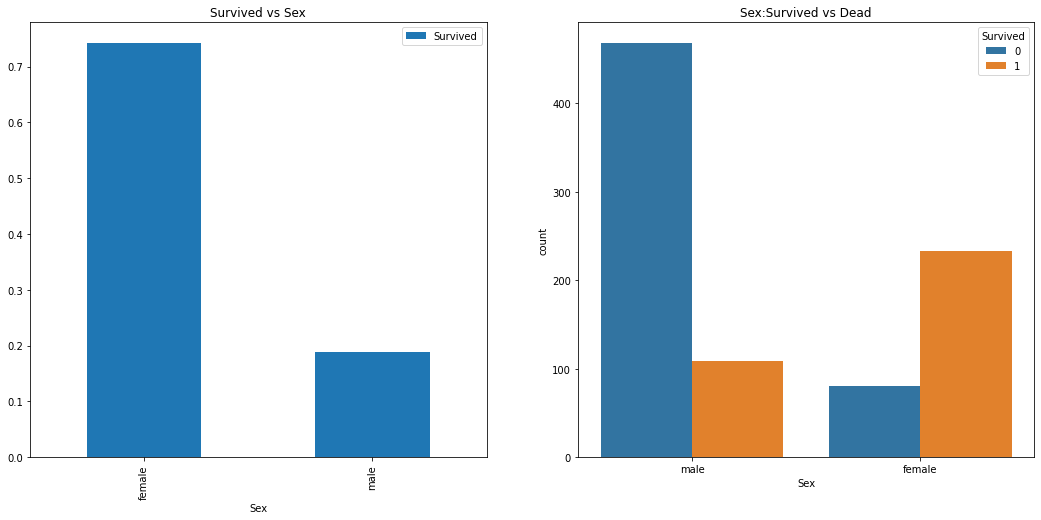

In [17]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=axes[0]) 
# 'Sex'와 'Survived'를 가져와서 'Sex'별로 survived의 평균값을 barplot으로 (pandas로 플랏접근)

**여성의 생존율이 훨씬 높다는 것을 알게 되었다.**

### 성별, 생존, 티켓등급 상관관계 ( Sex, survival, ticket grade correlation)


In [18]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')
# 다시한번 등급이 높을수록 생존 비율이 높으며 여성의 생존이 더 높다는것을 
# 알 수 있다.

### 나이와 생존과의 관계 (Relationship between Age and Survived)

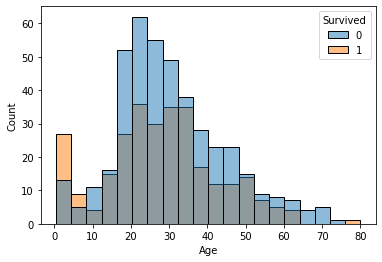

In [19]:
sns.histplot(x = 'Age',hue = 'Survived', data = train_df)

In [20]:
for total_data in combine:
  young_people = total_data.loc[total_data['Age'] < 10, 'Age']

young_people

21     9.00
80     6.00
89     2.00
117    1.00
161    7.00
194    8.00
196    6.00
201    0.33
203    8.00
250    0.92
263    1.00
281    0.75
283    9.00
284    2.00
296    1.00
307    0.83
354    0.17
379    5.00
389    6.00
409    3.00
Name: Age, dtype: float64

In [21]:
for total_data in combine:
  old_people = total_data.loc[total_data['Age']>70, 'Age']
old_people

96    76.0
Name: Age, dtype: float64

**생존이 더 높은 연령층은 10세 미만 아이들과  76세의 고령탑승객이다.**

### 형제, 배우자 수 와 부모, 자녀 수 의 생존과의 관계 (Relationship between Sibsp and Survived/ Relationship between Parch and Survived)

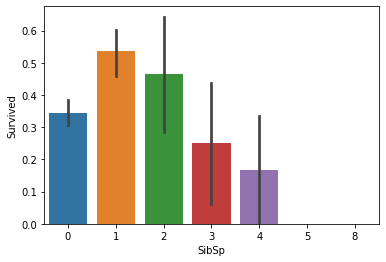

In [22]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)

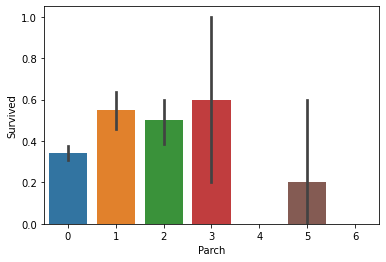

In [23]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)

### 탑승장소와 생존과의 관계 (Relationship between Embarked and Survived)

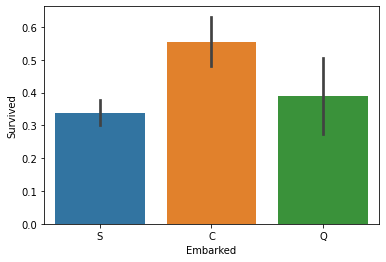

In [24]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

### 탑승장소와 등급에 따른 성별과 생존의 관계 (Embarked, Pclass, Sex and Survived correlation)

In [25]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

탑승장소에 대한 자세한 특성을 알아봐야할 필요가 있을것 같다.


### 각 변수들 간의 상관관계 (Correlation of each variable)



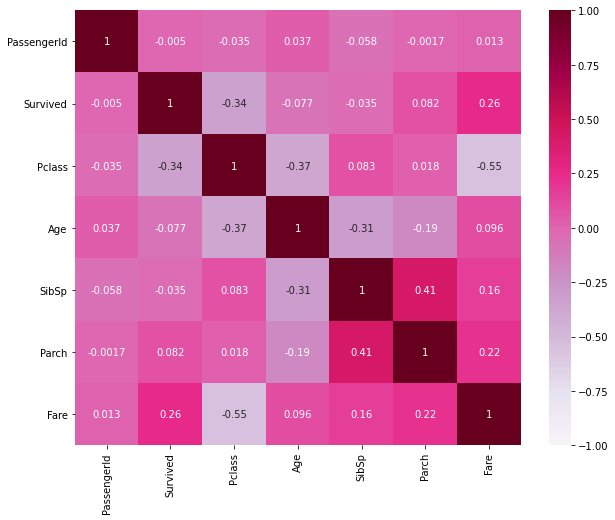

In [26]:
# heatmap을 사용하면 각 변수들 간의 correlation을 확인 할 수 있으며,
# 전처리 시 도움이 된다. 
sns.heatmap(train_df.corr(),vmin = -1, vmax = 1, annot=True,cmap='PuRd') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



As you can see, There are two type, one thing is positive correlation, the other thing is Negative correlation

In [27]:
pd.DataFrame(abs(train_df.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


- 이전에 Parch와 Sibsp는 한개의 컬럼으로 묶어도 괜찮을것 같다라고 말했는데 위의 히트맵의 관계 또한 높은것을 확인할 수 있다.

- Survived와 가장 관련이 있는것은 Fare인 것을 확인할 수 있다. 반면에 Pclass는 연관이 작아 보인다.

히트맵 코드 설명 (fig = plt.gcf())
plt.~~~ 코드로 그림을 그리는 방식을 상태기반(state-based)이라고 한다. 반면 그림의 구성요소를 지정해서 제어하는 것을 객체지향(object-oriented)방식이라고 한다. plt.로 그림을 그리다 보면 그림제어에 한계가 느껴져 객체지향으로 변환해야 하는데 그러때 쓰는것이 fig = plt.gcf()명령이다. 지금 그림(plt)의 전체영역(Figure)에 접근하겠다(gcf: get current figure)는 의미입니다. 

fig = plt.gcf()로 Figure객체를 fig라는 변수에 담은 후, figuresize 를 변경하는 명령이다.

하지만 matplot이 손에 익을 때 까지는 객체지향을 연습하며 사용하는것을 추천한다. ( 이재현 님 설명 인용)

In [28]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


heatmap 파라미터

- vmin : 최솟값
- vmax : 최댓값
- cbar : colorbar의 유무(True가 디폴트)
- center : 중앙값 선정
- linewidths : cell사이에 선을 그림
- annot : 각 셀 값 표기 유무
- fmt : 그 값의 데이터 타입 설정
- cmap : 히트맵 색상

# 데이터 전처리

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Name 컬럼 전처리

Name 의 경우는 성 으로 추정되는 데이터를 바탕으로 구분을 하고자 한다.

In [30]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
# 트레이닝 데이터
Name = []

for i in train_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name.append(h[:-1])

Name

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [32]:
# 테스트 데이터
Name2 = []

for i in test_df['Name']:
  for h in i.split(' '):
    if '.' in h:
      Name2.append(h[:-1])

Name2

['Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Master',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Ms',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'M

In [33]:
# train_df
train_df['Name'] = pd.Series(Name)
train_df['Name']

# test_df
test_df['Name'] = pd.Series(Name2)
test_df['Name'] 

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [34]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [35]:
train_df['Name'].nunique()

18

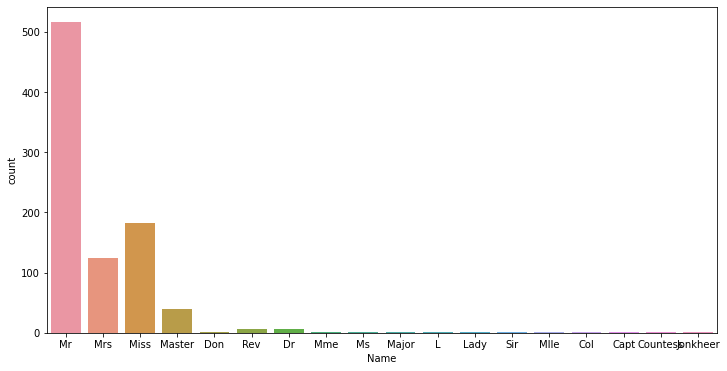

In [36]:
# 트레이닝 데이터
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = train_df)

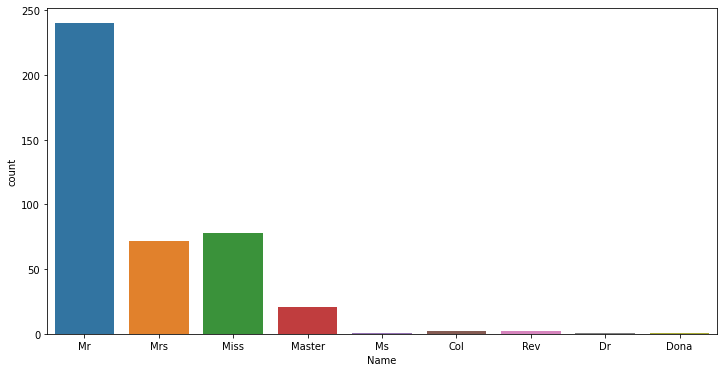

In [37]:
# 테스트 데이터
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Name',data = test_df)

Mr, Mrs, Miss, Master 를 제외한 다른 이름들은 극히 적은 인원수 를 가지고 있으므로 Others로 통일한다.

In [38]:
for all_data in combine:
  all_data['Name'] =all_data['Name'].replace (['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'L', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer','Dona'],'Others') # test셋에만 Dona라는 이름이 있으므로 주의

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Others,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
train_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [40]:
test_df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [41]:
# 다수의 이름 순서대로 mapping

name_mapping = {'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Others' : 4}
for all_data in combine:
  all_data['Name'] = all_data['Name'].map(name_mapping).astype(int)

# train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,male,NaN,0,0,359309,8.0500,NaN,S


## Sex 컬럽 전처리

남성은 0으로 여성은 1로 변환한다.

In [42]:
sex_mapping = {'male' : 0, 'female' : 1}
for all_data in combine:
  all_data['Sex'] = all_data['Sex'].map(sex_mapping).astype(int)
  
#train_df  
test_df



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,2,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,2,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,4,1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0,0,NaN,0,0,359309,8.0500,NaN,S


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## SibSp 와 Parch 컬럼 결합

동승자가 있다 ,없다 라는 기준으로 새로운 컬럼을 만든후 기존 컬럼을 제거했다.

In [45]:
for dataset in combine:
  dataset['Alone'] = dataset['SibSp'] + dataset['Parch']
  dataset = dataset.drop(['SibSp', 'Parch'], axis = 1,inplace=True)
   
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,1,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,2,1,35.0,113803,53.1000,C123,S,1
4,5,0,3,0,0,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,27.0,211536,13.0000,NaN,S,0
887,888,1,1,4,1,19.0,112053,30.0000,B42,S,0
888,889,0,3,1,1,NaN,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,1,0,26.0,111369,30.0000,C148,C,0


In [46]:
for dataset in combine:
  dataset.loc[dataset['Alone']==0,'Alone'] = 0
  dataset.loc[dataset['Alone']!=0,'Alone'] = 1

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,1,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,2,1,35.0,113803,53.1000,C123,S,1
4,5,0,3,0,0,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,27.0,211536,13.0000,NaN,S,0
887,888,1,1,4,1,19.0,112053,30.0000,B42,S,0
888,889,0,3,1,1,NaN,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,0,26.0,111369,30.0000,C148,C,0


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   Alone        418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


## Age 컬럼 전처리

**현재 까지 알고있는 전처리 방법론은  
첫 번째, 해당 행을 지우는 
방법 

두 번째, 평균 값 혹은 0 으로 바꾸는 방법

세 번째, 다른 컬럼들과의 관계를 이용하여 예측하는 방법으로 총 세가지이다.**

**그 중 Age는 생존율 예측에 있어서 중요한 데이터 이므로 약 900개중 200개 가량의 데이터를 지우는 것은 좋지 않으며, 평균 혹은 0으로 바꾸어 주는것 또한 중요한 컬럼인데 데이터의 퀄리티를 떨어트리기 때문에 세 번째 방법인 다른 컬럼들과의 관계를 통해 그 관계의 평균 값으로 Age를 예측하는 방법을 사용할 것이다.**

In [49]:
pd.DataFrame(abs(train_df.corr()['Age']).sort_values(ascending = False))

,Age
Age,1.000000
Pclass,0.369226
Alone,0.198270
Name,0.160136
Fare,0.096067
Sex,0.093254
Survived,0.077221
PassengerId,0.036847


In [50]:
train_df[['Alone',
          'Sex',
          'Age']].sample(10)

,Alone,Sex,Age
597,0,0,49.0
430,0,0,28.0
311,1,1,18.0
852,1,1,9.0
280,0,0,65.0
855,1,1,18.0
151,1,1,22.0
833,0,0,23.0
509,0,0,26.0
302,0,0,19.0


Sex와 Pclass의 관계를 통하여 Age를 유추한다.

In [51]:
guess_df1=[]
guess_df2=[]
guess_df3=[]
guess_df4=[]
guess_df5=[]
guess_df6=[]

guess_df1.append(train_df[(train_df['Alone'] == 0) & (train_df['Pclass'] == 1)]['Age'].median())
guess_df1

guess_df2.append(train_df[(train_df['Alone'] == 0) & (train_df['Pclass'] == 2)]['Age'].median())
guess_df2

guess_df3.append(train_df[(train_df['Alone'] == 0) & (train_df['Pclass'] == 3)]['Age'].median())
guess_df3

guess_df4.append(train_df[(train_df['Alone'] == 1) & (train_df['Pclass'] == 1)]['Age'].median())
guess_df4

guess_df5.append(train_df[(train_df['Alone'] == 1) & (train_df['Pclass'] == 2)]['Age'].median())
guess_df5

guess_df6.append(train_df[(train_df['Alone'] == 1) & (train_df['Pclass'] == 3)]['Age'].median())
guess_df6

total=[[guess_df1,guess_df2,guess_df3,guess_df4,guess_df5,guess_df6]] 
total

fill_age =np.array([total]).reshape(2,3)
fill_age

array([[38.5, 31. , 26. ],
       [36. , 27. , 18. ]])

In [52]:
train_df['Age'].head(30)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26     NaN
27    19.0
28     NaN
29     NaN
Name: Age, dtype: float64

In [53]:
for dataset in combine:
  for i in range(0, 2):
      for j in range(0, 3):
          dataset.loc[ (dataset.Age.isnull()) & (dataset.Alone == i) & (dataset.Pclass == j+1),\
                  'Age'] = fill_age[i,j]

dataset['Age'] = dataset['Age'].astype(int)

train_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,1,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,2,1,35.0,113803,53.1000,C123,S,1
4,5,0,3,0,0,35.0,373450,8.0500,NaN,S,0
5,6,0,3,0,0,26.0,330877,8.4583,NaN,Q,0
6,7,0,1,0,0,54.0,17463,51.8625,E46,S,0
7,8,0,3,3,0,2.0,349909,21.0750,NaN,S,1
8,9,1,3,2,1,27.0,347742,11.1333,NaN,S,1
9,10,1,2,2,1,14.0,237736,30.0708,NaN,C,1


In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 32.8+ KB


Age의 수가 많으므로 카테고리로 묶어서 인코딩한다.

In [56]:
# pd.cut함수는 동일길이로 나누어 범주를 만들어 주는 함수이다.
for total_df in combine:
  total_df['Age'] = pd.cut(total_df['Age'], 5)

train_df['Age']

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] <
                                    (48.168, 64.084] < (64.084, 80.0]]

인코딩 방법소개

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for total_df in combine:
  le.fit(total_df['Age'])
  total_df['Age'] = le.transform(total_df['Age'])

train_df['Age'].tail(50)


841    0
842    1
843    2
844    1
845    2
846    1
847    2
848    1
849    2
850    0
851    4
852    0
853    0
854    2
855    1
856    2
857    3
858    1
859    1
860    2
861    1
862    2
863    1
864    1
865    2
866    1
867    1
868    1
869    0
870    1
871    2
872    2
873    2
874    1
875    0
876    1
877    1
878    1
879    3
880    1
881    2
882    1
883    1
884    1
885    2
886    1
887    1
888    1
889    1
890    1
Name: Age, dtype: int64

**(-0.08, 16.0) = 0**

**(16.0, 32.0) = 1**

**(32.0, 48.0) = 2**

**(48.0, 64.0) = 3**

**(64.0, 80.0) = 4**         

## Ticket  컬럼전처리

티켓과 의 연관성을 찾지못하여 지워주었다.

In [58]:
for all_data in combine:
  all_data = all_data.drop('Ticket', axis = 1, inplace = True)

# train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,892,3,0,0,2,7.8292,NaN,Q,0
1,893,3,2,1,3,7.0000,NaN,S,1
2,894,2,0,0,4,9.6875,NaN,Q,0
3,895,3,0,0,1,8.6625,NaN,S,0
4,896,3,2,1,1,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,8.0500,NaN,S,0
414,1306,1,4,1,2,108.9000,C105,C,0
415,1307,3,0,0,2,7.2500,NaN,S,0
416,1308,3,0,0,1,8.0500,NaN,S,0


## Fare 컬럼 전처리

In [59]:
train_df['Fare'].head(15)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
Name: Fare, dtype: float64

Fare의 경우에는 1개의 결측값이 있어 중간값으로 채워주었다.

In [60]:
for total_df in combine:
  total_df['Fare'] = total_df['Fare'].fillna(total_df['Fare'].median()).round()

test_df['Fare']

0        8.0
1        7.0
2       10.0
3        9.0
4       12.0
       ...  
413      8.0
414    109.0
415      7.0
416      8.0
417     22.0
Name: Fare, Length: 418, dtype: float64

In [61]:
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().tail(20)
# train_df[['Fare','Survived']].groupby('Fare',as_index = False).count().tail(20)
train_df[['Fare','Survived']].groupby('Fare',as_index = False).mean().tail(20)

,Fare,Survived
70,94.0,1.000000
71,106.0,0.500000
72,109.0,0.500000
73,111.0,0.750000
74,113.0,0.666667
75,120.0,1.000000
76,134.0,1.000000
77,136.0,0.666667
78,147.0,1.000000
79,152.0,0.500000


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [63]:
#for total_df in combine:
#  total_df['Fare'] = pd.qcut(total_df['Fare'],4).astype
  

#train_df  
#test_df

In [64]:
#train_df['Fare'].unique()

In [65]:
#test_df['Fare'].unique()

높은 Fare의 분포가 현저히 작으므로 pd.cut을 통한 일정한 간격보다는 pd.qcut을 통해 같은 인원수로 묶어주었다. 

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Alone        891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    object 
 8   Alone        418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


1번 방법: categorical데이터는 연산이 안되어 다음과 같은 방법으로 바꾸어 주었다.

In [68]:
# for total_df in combine:
#   total_df.loc[total_df['Fare'] <= 8.0 ,'Fare'] = 0
#   total_df.loc[(total_df['Fare'] > 8.0) & (total_df['Fare'] <= 14.0) ,'Fare'] = 1
#   total_df.loc[(total_df['Fare'] > 14.0) & (total_df['Fare'] <= 31.75),'Fare'] = 2
#   total_df.loc[(total_df['Fare'] > 31.75) & (total_df['Fare'] <= 512.0),'Fare'] = 3

#   total_df['Fare'] = total_df['Fare'].astype(int)
  
# train_df.head()

2번 방법: LabelEncoder()사용

In [69]:
for total_df in combine:
 total_df['Fare'] = pd.qcut(total_df['Fare'],4)

train_df['Fare']

0      (-0.001, 8.0]
1      (31.0, 512.0]
2      (-0.001, 8.0]
3      (31.0, 512.0]
4      (-0.001, 8.0]
           ...      
886      (8.0, 14.0]
887     (14.0, 31.0]
888     (14.0, 31.0]
889     (14.0, 31.0]
890    (-0.001, 8.0]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 8.0] < (8.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for total_df in combine:
    le.fit(total_df['Fare'])
    total_df['Fare'] = le.transform(total_df['Fare'])

train_df['Fare'].head(50)

0     0
1     3
2     0
3     3
4     0
5     0
6     3
7     2
8     1
9     2
10    2
11    2
12    0
13    2
14    0
15    2
16    2
17    1
18    2
19    0
20    2
21    1
22    0
23    3
24    2
25    2
26    0
27    3
28    0
29    0
30    2
31    3
32    0
33    1
34    3
35    3
36    0
37    0
38    2
39    1
40    1
41    2
42    0
43    3
44    0
45    0
46    2
47    0
48    2
49    2
Name: Fare, dtype: int64

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,1,0,3,0,0,1,0,NaN,S,1
1,2,1,1,2,1,2,3,C85,C,1
2,3,1,3,1,1,1,0,NaN,S,0
3,4,1,1,2,1,2,3,C123,S,1
4,5,0,3,0,0,2,0,NaN,S,0


In [72]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Alone
0,892,3,0,0,2,0,NaN,Q,0
1,893,3,2,1,3,0,NaN,S,1
2,894,2,0,0,4,1,NaN,Q,0
3,895,3,0,0,1,1,NaN,S,0
4,896,3,2,1,1,1,NaN,S,1


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Cabin        204 non-null    object
 8   Embarked     889 non-null    object
 9   Alone        891 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 69.7+ KB


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Cabin        91 non-null     object
 7   Embarked     418 non-null    object
 8   Alone        418 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 29.5+ KB


## Cabin 컬럼 전처리

In [75]:
for total_df in combine:
  total_df = total_df.drop('Cabin', axis = 1, inplace = True)

test_df

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,892,3,0,0,2,0,Q,0
1,893,3,2,1,3,0,S,1
2,894,2,0,0,4,1,Q,0
3,895,3,0,0,1,1,S,0
4,896,3,2,1,1,1,S,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,S,0
414,1306,1,4,1,2,3,C,0
415,1307,3,0,0,2,0,S,0
416,1308,3,0,0,1,0,S,0


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     889 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   Fare         418 non-null    int64 
 6   Embarked     418 non-null    object
 7   Alone        418 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.2+ KB


## Embarked 컬럼 전처리

In [78]:
train_df['Embarked'].mode()

0    S
dtype: object

In [79]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    object
 8   Alone        891 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 62.8+ KB


In [80]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}

for total_df in combine:
  total_df['Embarked'] = total_df['Embarked'].map(embarked_mapping).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,0,1,0,0,1
1,2,1,1,2,1,2,3,1,1
2,3,1,3,1,1,1,0,0,0
3,4,1,1,2,1,2,3,0,1
4,5,0,3,0,0,2,0,0,0


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Alone        891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Name         418 non-null    int64
 3   Sex          418 non-null    int64
 4   Age          418 non-null    int64
 5   Fare         418 non-null    int64
 6   Embarked     418 non-null    int64
 7   Alone        418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


전처리 이후 Fare의 시각화

In [83]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone
147,148,0,3,1,1,0,3,0,1
827,828,1,2,0,0,0,3,1,1
730,731,1,1,1,1,1,3,0,0
115,116,0,3,0,0,1,0,0,0
225,226,0,3,0,0,1,1,0,0
589,590,0,3,0,0,1,0,0,0
62,63,0,1,0,0,2,3,0,1
287,288,0,3,0,0,1,0,0,0
368,369,1,3,1,1,1,0,2,0
339,340,0,1,0,0,2,3,0,0


In [84]:
test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Alone
271,1163,3,0,0,1,0,2,0
398,1290,3,0,0,1,0,0,0
142,1034,1,0,0,4,3,1,1
407,1299,1,0,0,3,3,1,1
51,943,2,0,0,1,2,1,0
82,974,1,0,0,3,2,0,0
106,998,3,0,0,1,0,2,0
345,1237,3,1,1,1,0,0,0
3,895,3,0,0,1,1,0,0
205,1097,1,0,0,2,2,1,0


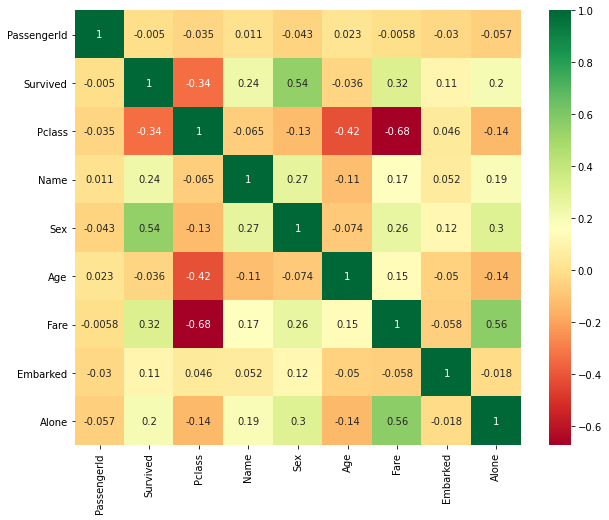

In [85]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# 머신러닝을 통한 학습

## 간단한 설명
머신러닝은 정말 많은 기법들이 있다. 그 중에서 이번 타이타닉 셋으로 이용할 수 있는 것으로 줄여보면 Classification(분류) 과 Regression(회귀) 그리고 Supervised(지도학습) 세가지의 교집합에 들어가는 기법들 중 가장 유리한 기법을 사용해야한다.

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - *** Supervised Learning plus Classification and Regression*** , we can narrow down our choice of models to a few. These include:

1. Logistic Regression
2. Support Vector Machines
3. Random Forest
4. KNN(K-Nearest Neighbors)
5. Naive Bayes
6. Decision Tree



In [86]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
x_train = train_df.drop(['Survived','PassengerId'], axis = 1).copy()
y_train = train_df['Survived']
x_test = test_df.drop('PassengerId', axis = 1).copy()


x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

## 1. Logistic Regression

Logistic Regression은 종속변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

In [88]:
logreg = LogisticRegression() # 모델 선언
logreg.fit(x_train, y_train) # 모델 학습
# 출력은 세팅값 (여러가지를 세부 세팅할 수 있음)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train)*100, 2)
acc_log


79.46

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.

- Inversely as Pclass increases, probability of Survived=1 decreases the most.

- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.

- So is Title as second highest positive correlation.

In [90]:
#79.57('Fare','Embarked'포함)
#79.57('Fare','Embarked'미포함)
#79.69('Embarked'미포함)

## 2. Support Vector Machines

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. 

In [91]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

82.38

## 3. KNN

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor

In [92]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

84.85

KNN confidence score is better than Logistics Regression but worse than SVM.

## 4. Gaussian Naibe Bayes


In [93]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

76.43

## 5. Perceptron


In [94]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

70.59

## 6. Linear SVC

In [95]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

78.68

## 7. Stochastic Gradient Descent

In [96]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

80.02

## 8. Decision Tree

In [97]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.66

In [98]:
#88.66('Fare','Embarked'포함)
#83.28('Fare','Embarked'미포함)
#86.42('Embarked'미포함)

## 9. Random Forest

In [99]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

88.66

In [106]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression", "Support Vector Machines","KNN","Gaussian Naibe Bayes",\
               "Perceptron","Linear SVC", "Stochastic Gradient Descent",\
               "Decision Tree","Random Forest"],
    "Score" : [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron,\
               acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
})

models.sort_values(by='Score',ascending = False)

,Model,Score
7,Decision Tree,88.66
8,Random Forest,88.66
2,KNN,84.85
1,Support Vector Machines,82.38
6,Stochastic Gradient Descent,80.02
0,Logistic Regression,79.46
5,Linear SVC,78.68
3,Gaussian Naibe Bayes,76.43
4,Perceptron,70.59
